In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset/books.csv')

In [3]:
dataset.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [5]:
dataset.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


Text(50.58159722222221, 0.5, 'Missing Values')

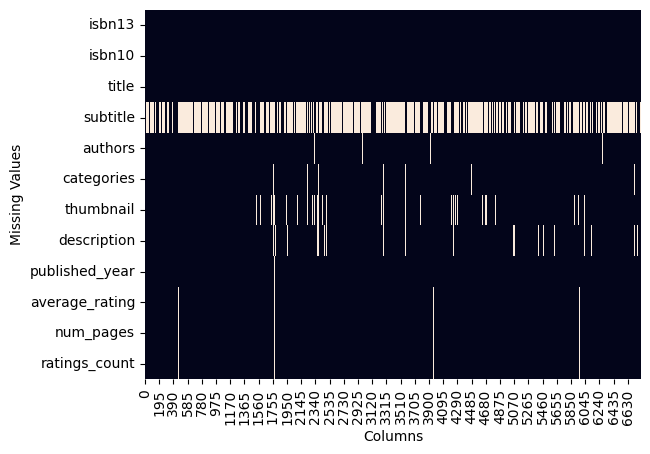

In [10]:
sns.heatmap(dataset.isna().transpose(), cbar=False)
plt.xlabel("Columns")
plt.ylabel("Missing Values")

array([[<Axes: title={'center': 'isbn13'}>,
        <Axes: title={'center': 'published_year'}>],
       [<Axes: title={'center': 'average_rating'}>,
        <Axes: title={'center': 'num_pages'}>],
       [<Axes: title={'center': 'ratings_count'}>, <Axes: >]],
      dtype=object)

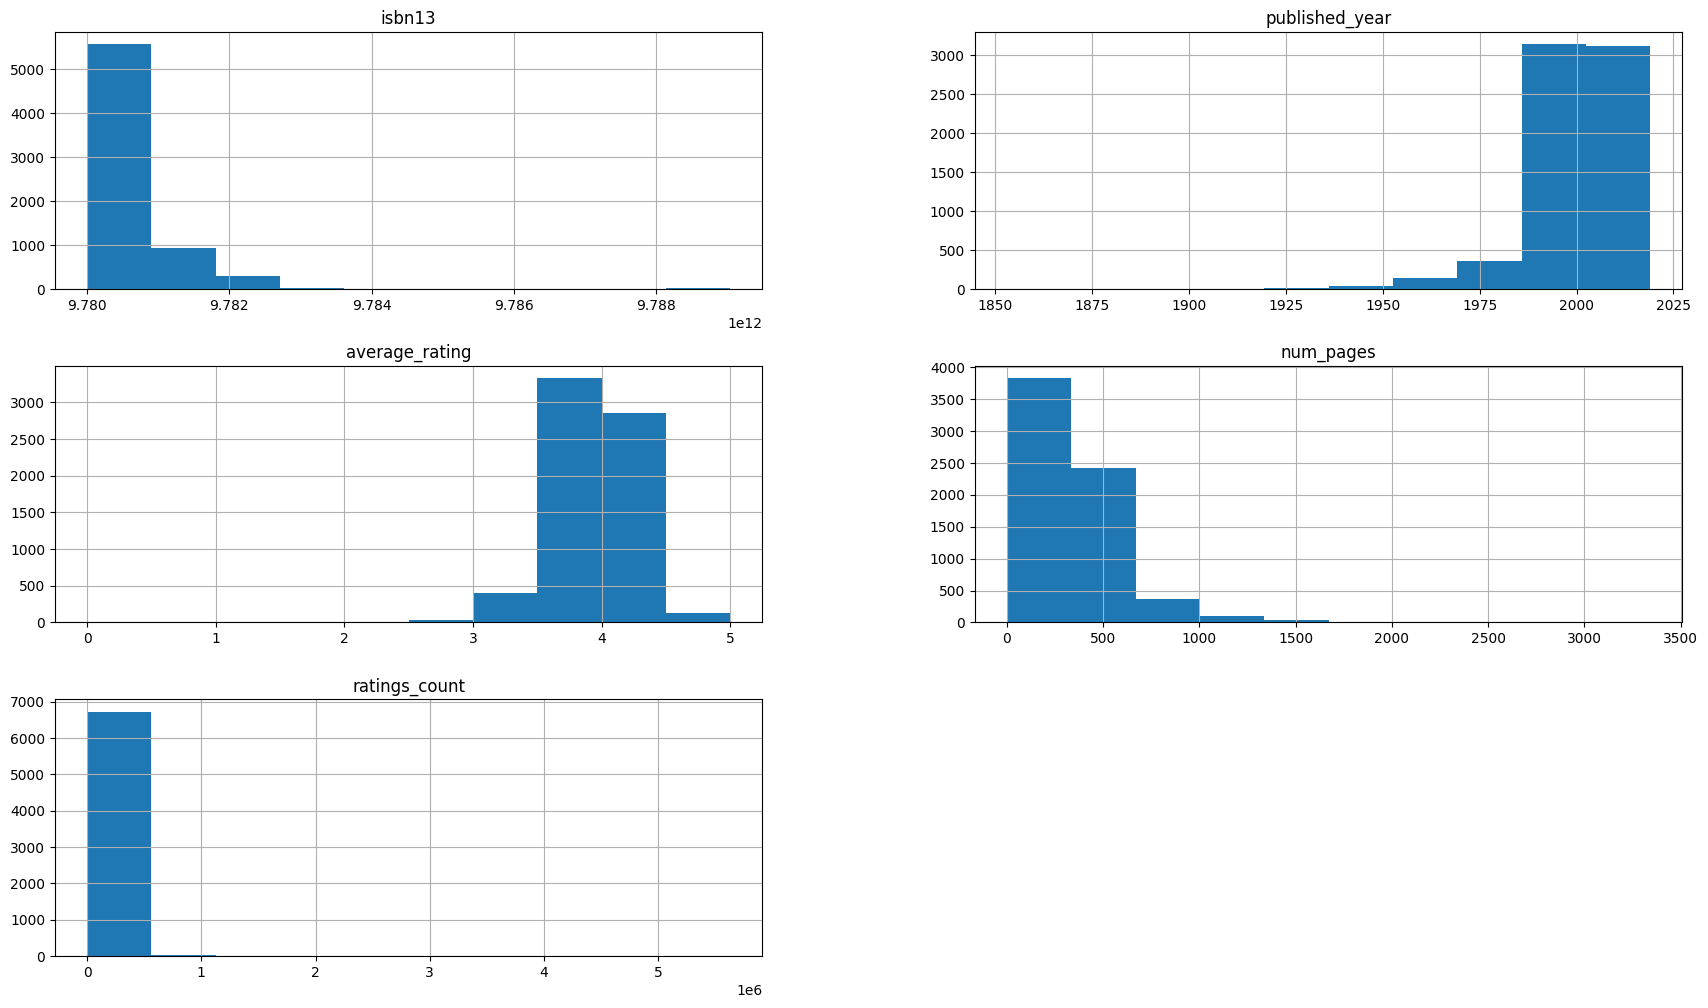

In [12]:
dataset.hist(figsize=(21,12))

In [20]:
dataset['missing_descriptions']=np.where(dataset['description'].isna(),1,0)
dataset['book_age']=2025 - dataset['published_year']

Text(0.5, 1.0, "Corr heatmap 'Spearman correlation'")

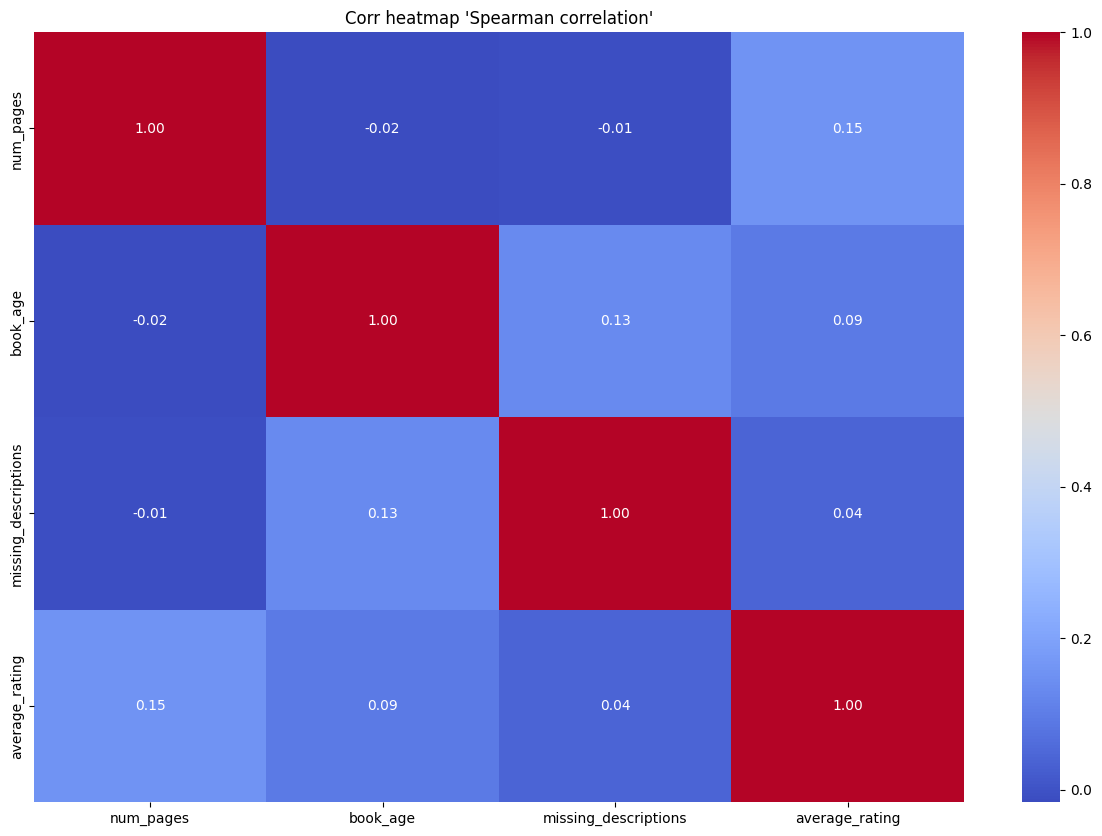

In [22]:
columns_of_interest = ['num_pages', 'book_age','missing_descriptions','average_rating']
plt.figure(figsize=(15,10))
sns.heatmap(dataset[columns_of_interest].corr(method="spearman"), annot=True, fmt=".2f", cmap="coolwarm").set_title("Corr heatmap 'Spearman correlation'")

In [26]:
dataset[(dataset['description'].isna()) |
        (dataset['num_pages'].isna())|
        (dataset['average_rating'].isna())|
        (dataset['published_year'].isna())
].shape

(303, 14)

In [27]:
missing_books = dataset[~(dataset['description'].isna())&
        ~(dataset['num_pages'].isna())&
        ~(dataset['average_rating'].isna())&
        ~(dataset['published_year'].isna())
]

In [28]:
missing_books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descriptions,book_age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [32]:
dataset['categories'].unique()

array(['Fiction', 'Detective and mystery stories', 'American fiction',
       'Christian life', 'Authors, English', 'Africa, East',
       'Hyland, Morn (Fictitious character)', 'Adventure stories',
       'Arthurian romances', 'Fantasy fiction', nan, 'English drama',
       'Country life', 'English fiction', 'Clergy',
       'Aubrey, Jack (Fictitious character)',
       'Detective and mystery stories, English', 'Black Death',
       'Human cloning', 'Science fiction', 'Great Britain',
       'American essays', 'China', 'Capitalism', 'Ireland',
       'Juvenile Fiction', "Children's stories, English",
       'Male friendship', 'Literary Collections',
       'Beresford, Tommy (Fictitious character)',
       'Imaginary wars and battles', 'Dysfunctional families',
       'Poirot, Hercule (Fictitious character)', 'Christmas stories',
       'Marple, Jane (Fictitious character)', 'Belgians',
       'Battle, Superintendent (Fictitious character)',
       'Baggins, Frodo (Fictitious character

In [35]:
dataset['categories'].nunique()

567

In [37]:
dataset['categories'].value_counts().reset_index().sort_values('count', ascending=False)

,categories,count
0,Fiction,2588
1,Juvenile Fiction,538
2,Biography & Autobiography,401
3,History,264
4,Literary Criticism,166
...,...,...
299,India,1
298,Murder,1
297,Cocaine industry,1
296,Buddhism,1


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                6810 non-null   int64  
 1   isbn10                6810 non-null   object 
 2   title                 6810 non-null   object 
 3   subtitle              2381 non-null   object 
 4   authors               6738 non-null   object 
 5   categories            6711 non-null   object 
 6   thumbnail             6481 non-null   object 
 7   description           6548 non-null   object 
 8   published_year        6804 non-null   float64
 9   average_rating        6767 non-null   float64
 10  num_pages             6767 non-null   float64
 11  ratings_count         6767 non-null   float64
 12  missing_descriptions  6810 non-null   int64  
 13  book_age              6804 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 745.0+ KB


In [39]:
dataset['words_in_description']=dataset["description"].str.split().str.len()

In [40]:
dataset

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descriptions,book_age,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0,NaN
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,21.0,NaN
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245.0


Text(0.5, 0, 'No. of words')

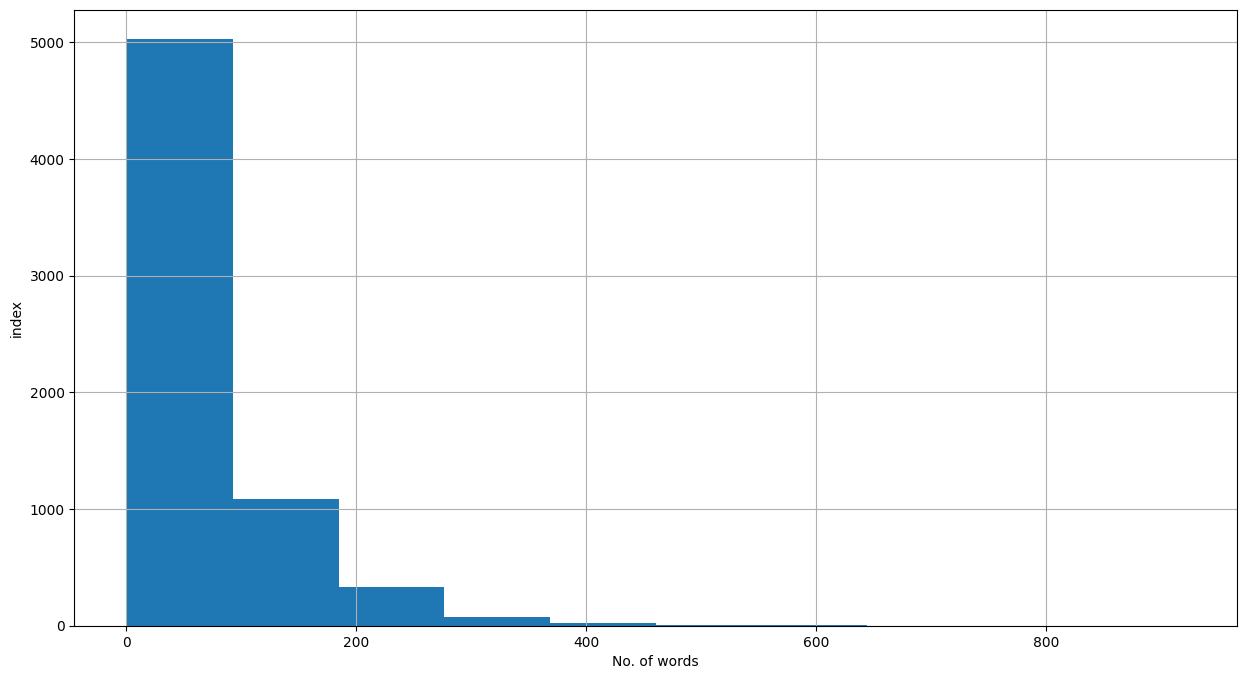

In [49]:
dataset['words_in_description'].hist(figsize=(15,8))
plt.ylabel("index")
plt.xlabel('No. of words')


In [50]:
dataset.loc[dataset['words_in_description'].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [51]:
dataset.loc[dataset['words_in_description'].between(5,14),"description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 312, dtype: object

In [52]:
dataset.loc[dataset['words_in_description'].between(15,24),"description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 950, dtype: object

In [53]:
dataset.loc[dataset['words_in_description'].between(25,34),"description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6798    Presents the adventures of a new group of hero...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1233, dtype: object

In [54]:
books_missing_25_words_desc = dataset[dataset['words_in_description']>25]

In [55]:
books_missing_25_words_desc

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descriptions,book_age,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288.0
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174.0


In [62]:
dataset_cleaned = missing_books

In [64]:
dataset_cleaned.shape

(6507, 14)

In [66]:
missing_books['words_in_description']=missing_books["description"].str.split().str.len()

/tmp/ipykernel_50470/1180096360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_books['words_in_description']=missing_books["description"].str.split().str.len()


In [70]:
missing_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                6507 non-null   int64  
 1   isbn10                6507 non-null   object 
 2   title                 6507 non-null   object 
 3   subtitle              2281 non-null   object 
 4   authors               6444 non-null   object 
 5   categories            6474 non-null   object 
 6   thumbnail             6293 non-null   object 
 7   description           6507 non-null   object 
 8   published_year        6507 non-null   float64
 9   average_rating        6507 non-null   float64
 10  num_pages             6507 non-null   float64
 11  ratings_count         6507 non-null   float64
 12  missing_descriptions  6507 non-null   int64  
 13  book_age              6507 non-null   float64
 14  words_in_description  6507 non-null   int64  
dtypes: float64(5), int64(3), o

In [74]:
books_missing_25_words_desc = missing_books[missing_books['words_in_description']>=25]

In [75]:
books_missing_25_words_desc.shape

(5197, 15)

In [77]:
books_missing_25_words_desc["title_and_subtitle"] = (
    np.where(books_missing_25_words_desc["subtitle"].isna(), books_missing_25_words_desc["title"],
             books_missing_25_words_desc[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

/tmp/ipykernel_50470/3180829787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words_desc["title_and_subtitle"] = (


In [78]:
books_missing_25_words_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_descriptions  5197 non-null   int64  
 13  book_age              5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
 15  title_and_subtitle    5197

In [80]:
books_missing_25_words_desc["tagged_description"] = books_missing_25_words_desc[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

/tmp/ipykernel_50470/2392458454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words_desc["tagged_description"] = books_missing_25_words_desc[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [84]:
books_missing_25_words_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_descriptions  5197 non-null   int64  
 13  book_age              5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
 15  title_and_subtitle    5197

In [86]:
books_missing_25_words_desc.drop(["subtitle", "missing_descriptions", "book_age", "words_in_description"], axis=1).to_csv("dataset/books_cleaned.csv", index = False)